In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
sns.set()

In [20]:
loan_data= pd.read_csv('LoanApproval.csv')

loan_data.shape

(614, 6)

In [21]:
loan_prep= loan_data.copy()

In [22]:
loan_prep.isnull().sum()

gender     13
married     3
ch         50
income      0
loanamt    22
status      0
dtype: int64

In [23]:
loan_prep.dropna(axis=0)

,gender,married,ch,income,loanamt,status
1,Male,Yes,1.0,4583,128.0,N
2,Male,Yes,1.0,3000,66.0,Y
3,Male,Yes,1.0,2583,120.0,Y
4,Male,No,1.0,6000,141.0,Y
5,Male,Yes,1.0,5417,267.0,Y
...,...,...,...,...,...,...
609,Female,No,1.0,2900,71.0,Y
610,Male,Yes,1.0,4106,40.0,Y
611,Male,Yes,1.0,8072,253.0,Y
612,Male,Yes,1.0,7583,187.0,Y


In [24]:
loan_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gender   601 non-null    object 
 1   married  611 non-null    object 
 2   ch       564 non-null    float64
 3   income   614 non-null    int64  
 4   loanamt  592 non-null    float64
 5   status   614 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 28.9+ KB


In [25]:
cols= ["gender", "married", "ch", "status"]
for col in cols:
    loan_prep[col]=loan_prep[col].astype('category')

loan_prep= pd.get_dummies(loan_prep, drop_first=True)

In [26]:
loan_prep.head()

,income,loanamt,gender_Male,married_Yes,ch_1.0,status_Y
0,5849,NaN,1,0,1,1
1,4583,128.0,1,1,1,0
2,3000,66.0,1,1,1,1
3,2583,120.0,1,1,1,1
4,6000,141.0,1,0,1,1


In [27]:
loan_prep= loan_prep.dropna()

In [28]:
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
loan_prep['income']= scale.fit_transform(loan_prep[['income']])
loan_prep['loanamt']= scale.fit_transform(loan_prep[['loanamt']])

In [29]:
 from sklearn.model_selection import train_test_split

Y= loan_prep['status_Y']
X= loan_prep.drop(['status_Y'], axis=1)

x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size=0.3, random_state=12, stratify= Y)
#stratify to prevent all yes/nos in training/testing sets

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
lr= LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [32]:
y_pred= lr.predict(x_test)

In [33]:
print(y_pred)

[1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0
 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 0 0 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1 0 1]


In [34]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
print(cm)

[[ 30  24]
 [ 15 109]]


In [35]:
lr.score(x_test, y_test)

0.7808988764044944

In [36]:
from sklearn.metrics import classification_report, accuracy_score

In [37]:
cr= classification_report(y_test, y_pred)
acc= accuracy_score(y_test, y_pred)

print(cr, acc)

              precision    recall  f1-score   support

           0       0.67      0.56      0.61        54
           1       0.82      0.88      0.85       124

    accuracy                           0.78       178
   macro avg       0.74      0.72      0.73       178
weighted avg       0.77      0.78      0.77       178
 0.7808988764044944


In [40]:
y_prob= lr.predict_proba(x_test)
print(y_prob)
print(y_pred)

[[0.17583127 0.82416873]
 [0.65519522 0.34480478]
 [0.59664537 0.40335463]
 [0.26506392 0.73493608]
 [0.13478153 0.86521847]
 [0.72927655 0.27072345]
 [0.18882732 0.81117268]
 [0.26958639 0.73041361]
 [0.19839256 0.80160744]
 [0.21792697 0.78207303]
 [0.61185259 0.38814741]
 [0.19699181 0.80300819]
 [0.19219123 0.80780877]
 [0.19396882 0.80603118]
 [0.15946441 0.84053559]
 [0.27051331 0.72948669]
 [0.14618956 0.85381044]
 [0.19623205 0.80376795]
 [0.72177291 0.27822709]
 [0.20137756 0.79862244]
 [0.71442799 0.28557201]
 [0.1942831  0.8057169 ]
 [0.16265782 0.83734218]
 [0.18360109 0.81639891]
 [0.19302297 0.80697703]
 [0.2824786  0.7175214 ]
 [0.2510368  0.7489632 ]
 [0.16915713 0.83084287]
 [0.25668491 0.74331509]
 [0.18231157 0.81768843]
 [0.28990331 0.71009669]
 [0.266301   0.733699  ]
 [0.28980608 0.71019392]
 [0.19843629 0.80156371]
 [0.17947245 0.82052755]
 [0.18258769 0.81741231]
 [0.20534616 0.79465384]
 [0.61361722 0.38638278]
 [0.27675078 0.72324922]
 [0.28988973 0.71011027]


In [41]:
#adjusting thresholds
y_prob= lr.predict_proba(x_test)[:,1]
y_adjusted_pred=[]
threshold = 0.8
for i in range(0, len(y_prob)):
    if y_prob[i]>threshold:
        y_adjusted_pred.append(1)
    else: y_adjusted_pred.append(0)

print(y_adjusted_pred)

[1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]


In [42]:
cr_adj= classification_report(y_test,y_adjusted_pred)
acc_adj= accuracy_score(y_test, y_adjusted_pred)

print(cr_adj, acc_adj)

              precision    recall  f1-score   support

           0       0.43      0.85      0.58        54
           1       0.89      0.52      0.65       124

    accuracy                           0.62       178
   macro avg       0.66      0.68      0.61       178
weighted avg       0.75      0.62      0.63       178
 0.6179775280898876


In [44]:
 from sklearn.metrics import roc_curve, roc_auc_score

In [45]:
fpr, tpr, threshold= roc_curve(y_test, y_adjusted_pred)

In [46]:
AUC= roc_auc_score(y_test, y_adjusted_pred)

0.6839904420549582


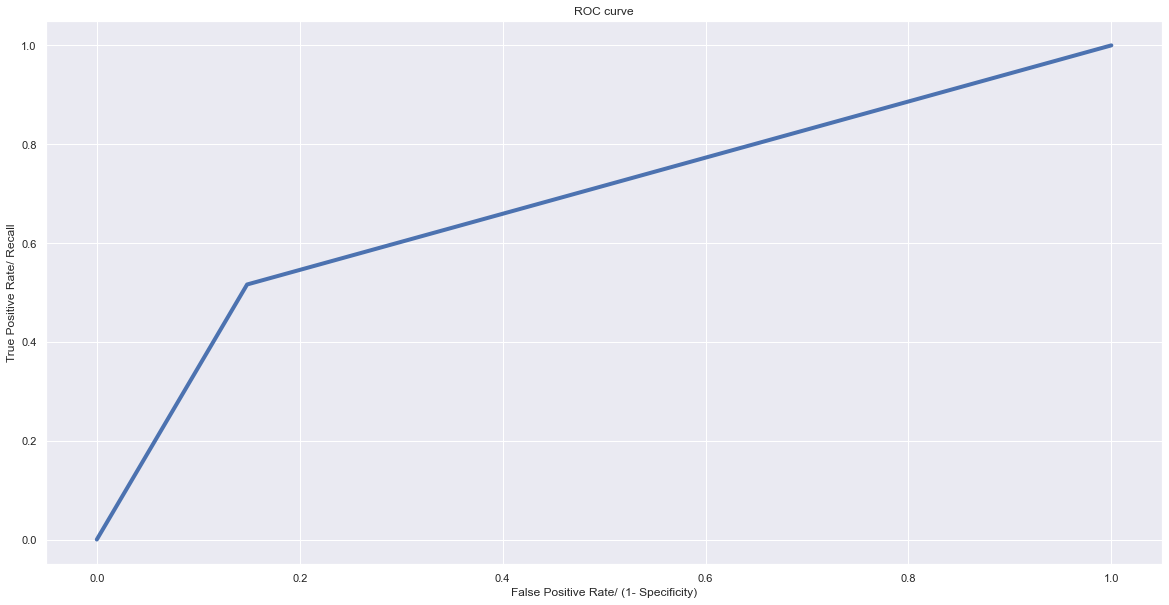

In [50]:
plt.figure(figsize= (20,10))
plt.plot(fpr, tpr, linewidth=4)
plt.xlabel("False Positive Rate/ (1- Specificity)")
plt.ylabel("True Positive Rate/ Recall")
plt.title("ROC curve")
print(AUC)